In [1]:
import os
os.environ["PYTHONWARNINGS"] = "ignore"

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import scanpy as sc
import squidpy as sq

In [4]:
# set working directory
project_dir = "/Users/cenkcelik/Cenk_scoring/"
working_dir = project_dir + ""
os.chdir(working_dir)

# set figure directory
figure_dir = working_dir + "figures/"

# processed data directory
processed_data = working_dir + "processed_data/"

In [5]:
# import a local package
import sys
sys.path.append("/Users/cenkcelik/Documents/GitHub/EnrichMap/")
import enrichmap as em

In [6]:
adata = sc.read_h5ad("/Users/cenkcelik/Cenk_scoring/processed_data/xenium_aligned_ductal_invasive.h5ad")

In [7]:
dcis_1_genelist = [
    "IRX1", "SOX10", "COL1A1", "KLK5", "THBS2", "DSC3", "DSG3", "SYNM", "C2orf40", "KRT17",
    "NGFR", "TRIM29", "KLK7", "COL17A1", "MYH11", "SAA1", "CILP", "MT1X", "COL6A3", "KRT6B",
    "MIA", "COL5A2", "COL1A2", "NTRK2", "LAMB3", "KRT14", "TP63", "COL3A1", "PTN", "FN1",
    "SERPINB5", "ACTG2", "SFRP1", "KCNMB1", "CRYAB", "COL12A1", "POSTN", "SFRP2", "FAT2",
    "CALML3", "CTHRC1", "SFN", "CHI3L1", "CDH3", "CTSK", "MMP11", "LRRC15", "COL5A1",
    "IL17B", "MAMDC2"
] # https://doi.org/10.1038/s41467-022-30573-4

dcis_2_genelist = [
    "EN1", "ELF5", "FOXC1", "LPIN1", "TTYH1", "FAM171A1", "ROPN1B", "HAPLN3", "FSCN1",
    "UCHL1", "LOC101927703", "CP", "FOXA1", "SLPI", "ART3", "TMEM158", "ROPN1",
    "LOC101930033", "GABRP", "KRT16", "OGFRL1", "GLIPR2", "OLFM2", "CHODL", "CT83",
    "CALB2", "DSC2", "NRN1", "B3GNT5", "XBP1", "MFGE8", "PDXK", "CSN3", "LOC401286",
    "LOC149684", "PGBD5", "AARD", "SOX10", "KCNQ4", "LOC102723775", "PADI2",
    "C1orf198", "RP11-189B4.6", "DGAT2", "PSAT1", "RASD2", "PRR15", "RGS2", "AIF1L", "MRAS"
] # https://doi.org/10.1038/s41467-022-30573-4

exhaustion_genelist = [
    "TRAC", "CD8A", "GZMB", "CD2", "CD27", "CD5", "CD69", "CD28"
]

# filter the gene list
def filter_genes(adata, gene_list):
    filtered_genes = []
    for gene in gene_list:
        if gene in adata.var_names:
            filtered_genes.append(gene)
    return filtered_genes

dcis_1_genelist = filter_genes(adata, dcis_1_genelist)
dcis_2_genelist = filter_genes(adata, dcis_2_genelist)
exhaustion_genelist = filter_genes(adata, exhaustion_genelist)

In [8]:
signatures_dict = {
    "DCIS_1": dcis_1_genelist,
    "DCIS_2": dcis_2_genelist,
    "T cell": exhaustion_genelist
}

In [9]:
em.tl.score(
    adata,
    gene_set=signatures_dict,
    smoothing=True,
    correct_spatial_covariates=True,
    batch_key=None
)

Scoring signatures: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


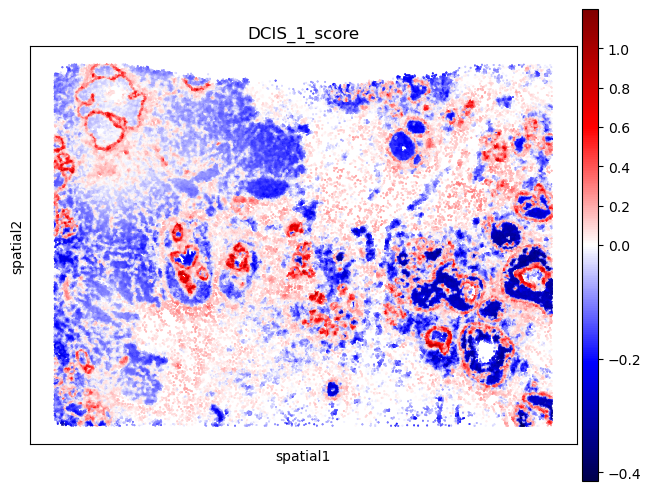

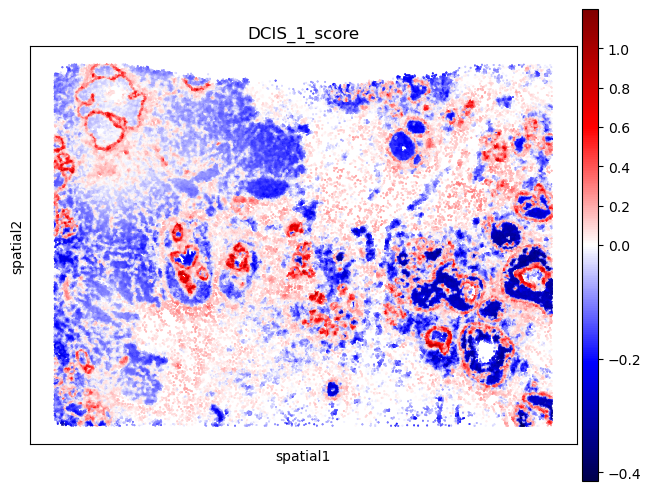

In [10]:
sq.pl.spatial_scatter(adata, shape=None, color=["DCIS_1_score"], cmap="seismic", size=0.5, vcenter=0, save=figure_dir + "DCIS_1_scores.pdf")
sq.pl.spatial_scatter(adata, shape=None, color=["DCIS_1_score"], cmap="seismic", size=0.5, vcenter=0, save=figure_dir + "DCIS_1_scores.png")

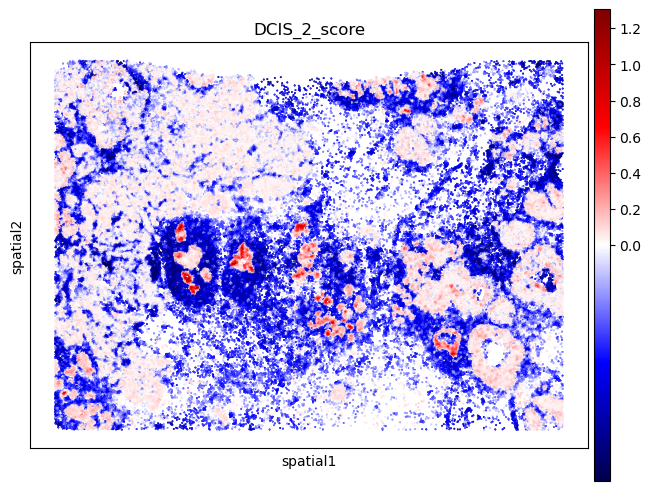

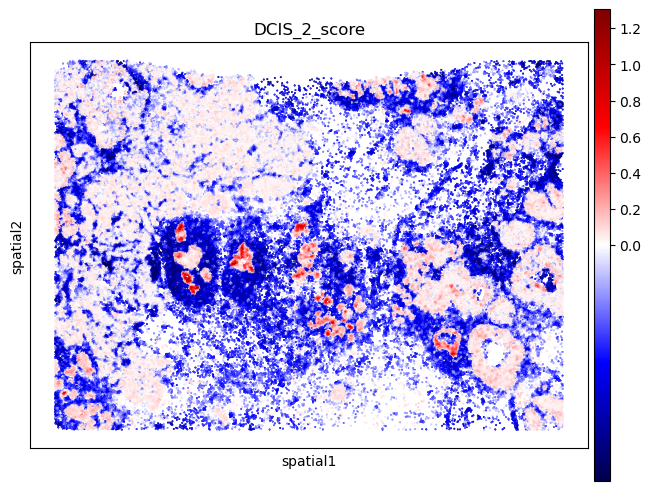

In [11]:
sq.pl.spatial_scatter(adata, shape=None, color=["DCIS_2_score"], cmap="seismic", size=0.5, vcenter=0, save=figure_dir + "DCIS_2_scores.pdf")
sq.pl.spatial_scatter(adata, shape=None, color=["DCIS_2_score"], cmap="seismic", size=0.5, vcenter=0, save=figure_dir + "DCIS_2_scores.png")

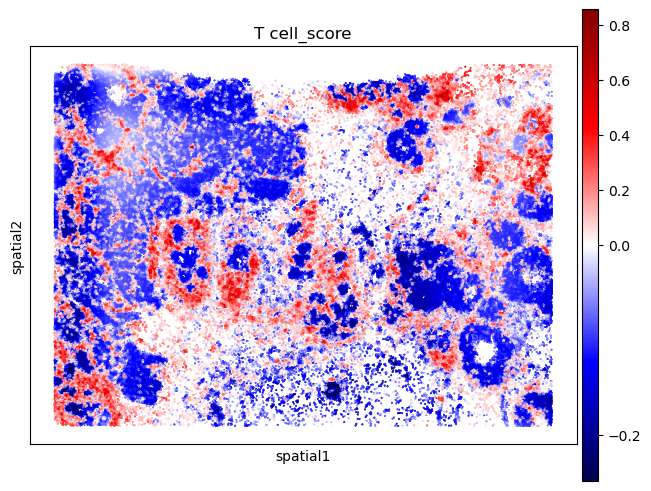

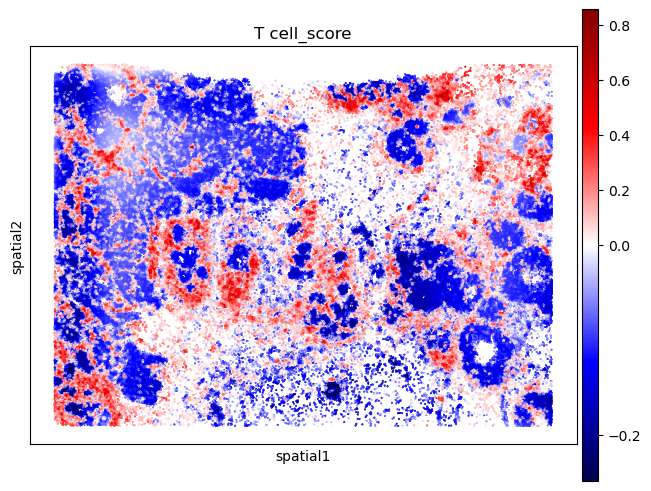

In [12]:
sq.pl.spatial_scatter(adata, shape=None, color=["T cell_score"], cmap="seismic", size=0.5, vcenter=0, save=figure_dir + "T_cell_scores.pdf")
sq.pl.spatial_scatter(adata, shape=None, color=["T cell_score"], cmap="seismic", size=0.5, vcenter=0, save=figure_dir + "T_cell_scores.png")

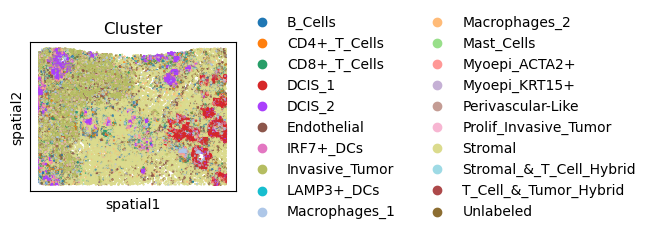

In [13]:
sq.pl.spatial_scatter(adata, shape=None, color=["Cluster"], cmap="seismic", size=0.5, save=figure_dir + "Cluster.pdf")

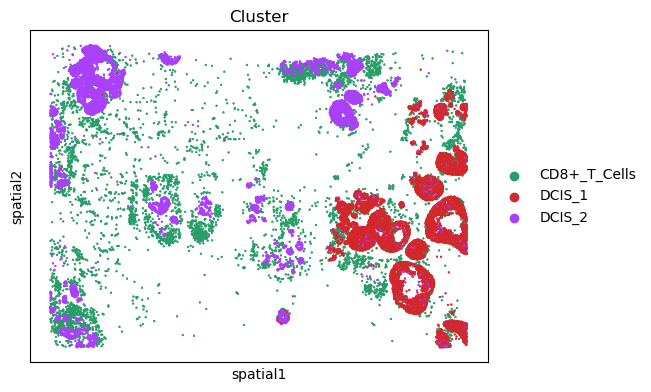

In [14]:
sq.pl.spatial_scatter(adata, shape=None, color=["Cluster"], groups=["DCIS_1", "DCIS_2", "CD8+_T_Cells"], cmap="seismic", size=1, save=figure_dir + "DCIS_1_2.pdf")